<h2> Regresión Lineal Múltiple: un escenario más realista

Si bien el caso de regresión lineal simple es interesante y permite explorar la relación entre dos variables, es un escenario muy idealista y no permite abordar los casos más reales. De esta manera, extendemos la definición a múltiples variables y definimos el modelo de regresión lineal múltiple como:

$$y_{i} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \cdots + \beta_{k} x_{k} + \epsilon_{i}$$

Considerando una muestra de $N$ individuos, el modelo se puede expresar matricialmente como

$$ \mathbf{Y} = \mathbf{X}\mathbf{\beta} + \mathbf{e} =  \begin{pmatrix}
1 & x_{11} &  \cdots& x_{1k} \\
1 & x_{21} & \cdots & x_{2k} \\
 \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & \cdots & x_{nk} \\
\end{pmatrix} \begin{pmatrix}
 \beta_0 \\
 \beta_1 \\
 \vdots \\
 \beta_k
\end{pmatrix} + \begin{pmatrix}
 \epsilon_1 \\
 \epsilon_2 \\
 \vdots \\
 \epsilon_N
\end{pmatrix} $$

Y la función de pérdida de **Mínimos Cuadrados Ordinarios** es:

$$ \mathbf{e} ^{T} \mathbf{e}= (\mathbf{Y} - \mathbf{X}\mathbf{\beta})^{T} (\mathbf{Y} - \mathbf{X}\mathbf{\beta})$$

Y la solución del problema de minimización es:

$$\mathbf{\beta}^{*} = \left(\mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^{T} \mathbf{Y}$$

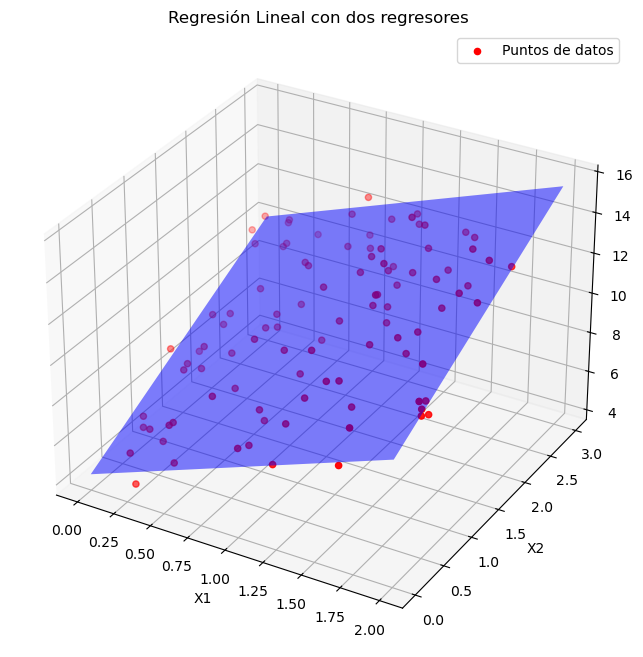

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generating random data
np.random.seed(0)
n_samples = 100
X1 = 2 * np.random.rand(n_samples, 1)
X2 = 3 * np.random.rand(n_samples, 1)
y = 4 + 3 * X1 + 2 * X2 + np.random.randn(n_samples, 1)

# Fit linear regression model
reg = LinearRegression()
X = np.hstack((X1, X2))
reg.fit(X, y)
coef = reg.coef_
intercept = reg.intercept_

# Create meshgrid for plotting
x1_range = np.linspace(0, 2, 10)
x2_range = np.linspace(0, 3, 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_mesh = intercept + coef[0][0] * x1_mesh + coef[0][1] * x2_mesh

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, color='red', label='Puntos de datos')
ax.plot_surface(x1_mesh, x2_mesh, y_pred_mesh, alpha=0.5, rstride=100, cstride=100, color='blue')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.title('Regresión Lineal con dos regresores')
plt.legend()
plt.show()

## Ejemplo con regresión lineal múltiple

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import statsmodels.regression.linear_model as sm

In [ ]:
# apertura de archivo
ruta = "50_Startups.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [ ]:
#Ahorra se debe pasar a variable dummy con onehotencoder
#tranforma el arreglo en un arreglo de numpy
data = np.array(X)
# Separar la primera columna del resto
first_column = data[:, 3].reshape(-1, 1)
other_columns = data[:, 0:3]

# Crear el codificador OneHotEncoder
encoder = preprocessing.OneHotEncoder(sparse_output=False)

# Ajustar y transformar la primera columna
first_column_encoded = encoder.fit_transform(first_column)

# Concatenar la columna codificada con las demás columnas
X = np.hstack((first_column_encoded, other_columns))

X

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
#para evitar la colinialidad se debe eliminar una de las variables dummy

X = X[:, 1:]

X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [ ]:
#Division de Datos - entrenamiento y validacion
#divide los datos en 20% para la validacion y se colocar una semilla para hacer la division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
#Ajustar el modelo de regresion linal multiple con el modelo de entrenamietno

regresion = LinearRegression()
regresion.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Prediccion de resultados con el conjunto de testing

y_pred = regresion.predict(X_test)

# Se comparan los valores predichos por el modelo con los valores originales

#valores predichos por el modelo
print(y_pred)
#valors originales
y_test

[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]


array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
#Aplicacion de Eliminacion hacia atras

# Crear una columna de unos enteros con el mismo número de filas que el arreglo 'data'
new_column = np.ones((data.shape[0], 1), dtype=int)
# Concatenar la nueva columna al inicio del arreglo 'data'
X_actualizado = np.hstack((new_column, X))

X_actualizado

array([[1, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [1, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [1, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [1, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [1, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [1, 0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1, 1.0, 0.0, 9

In [ ]:
SL = 0.05
X_opt = X_actualizado[:, [0, 1, 2, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           1.34e-27
Time:                        12:37:31   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# el p valor -> (P>|t|) deber ser menor a 0.05, si no es asi y eliminando las variables que
# sepasen por mas hasta llegar al modelo optimo

#se saca la variable dummy de una de las ciudades
X_opt = X_actualizado[:, [0, 1, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.49e-29
Time:                        12:37:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#ahora se saca la otra ciudad
X_opt = X_actualizado[:, [0, 3, 4, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.53e-30
Time:                        12:38:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#ahora se saca la columna gastos de administracion
X_opt = X_actualizado[:, [0, 3, 5]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           2.16e-31
Time:                        12:38:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# se saca el gasto por marketing

# La aplicacion extricta del p valor nos dejaria una regresion linneal
# Pero existen otros metodos disponibles, criterio de baessiano o acaike

X_opt = X[:, [0, 3]]
regression_OLS = sm.OLS(endog = y, exog = X_opt.tolist()).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              167.3
Date:                Fri, 11 Oct 2024   Prob (F-statistic):                    2.32e-22
Time:                        12:38:18   Log-Likelihood:                         -603.36
No. Observations:                  50   AIC:                                      1211.
Df Residuals:                      48   BIC:                                      1215.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.471e+04   1.29e+04      1.140      0.260   -1.12e+04    4.07e+04
x2             0.8546      0.059     14.574      0.000       0.737       0.973
==============================================================================
Omnibus:                        0.329   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.507
Skew:                           0.073   Prob(JB):                        0.776
Kurtosis:                       2.529   Cond. No.                     2.64e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3> Regresión polinómica y logarítmica</h3>


Una vez comprendido el modelo de regresión lineal, vale la pena pensar en si la misma teoría es útil para explicar relaciones no lineales entre variables, y la respuesta es "sí". En particular, considere los siguientes modelos de regresión:

$$y_{i} = \beta_{0} + \beta_{1} x_{i1} + \beta_{2} x_{i2}^{2} + \beta_{3} x_{i3}^{3} + \epsilon_{i}$$
$$y_{i} = \beta_{0} + \beta_{1} ln(x_{i}) + z_{i} + \epsilon$$
$$ln(y_{i}) = \beta_{0} + ln(x_{i}) + \epsilon$$

Aunque, pueda ser sorprendente (y, contraintuitivo al comienzo), **TODOS ESTOS EJEMPLOS SON CASOS PARTICULARES DEL MODELO DE REGRESIÓN LINEAL**. Para entender porqué, utilicemos el primer ejemplo, y definamos un modelo de regresión lineal con tres regresores:

$$y_{i} = \beta_{0} + \beta_{1} x_{i} + \beta_2 z_{i} + \beta_{3} w_{i} + \epsilon_i$$

Claramente, esta ecuación es lineal en $x$, $z$ y $w$, así que basta con hacer $z = x^2$ y $w = x^3$ para obtener el modelo de regresión de nuestro ejemplo. Y, el mismo ejercicio puede hacerse aplicando cualquier otro tipo de función (P.ej. Logarítmica, exponencial, radical).

**Interpretación de los parámetros del modelo logarítmico**

| Nombre del modelo | Ecuación | Escala de y | Escala de x | Interpretación de $\beta$|
| --- | --- | --- | --- | --- |
| $$\text{lin - lin}$$ | $$y = \alpha + \beta x$$ | $$y$$ | $$x$$ | Si $x$ cambia en una unidad, $y$ cambia en $\beta$ unidades|
| $$\text{log - lin}$$ | $$ln(y) = \alpha + \beta x$$ | $$ln(y)$$ | $$x$$ |Si $x$ cambia en una unidad, $y$ cambia en $\beta * 100$ % |
| $$\text{lin - log}$$ | $$y = \alpha + \beta ln(x)$$ | $$y$$ | $$ln(x)$$ | Si $x$ cambia en un $1 \%$, $y$ cambia en $\beta /100$ unidades |
| $$\text{log - log}$$ | $$ln(y) = \alpha + \beta ln(x)$$ | $$ln(y)$$ | $$ln(x)$$ | Si $x$ cambia en un $1 \%$, $y$ cambia en un $\beta \%$|

# Regresión Lineal Polinómica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [ ]:
# apertura de archivo
ruta = "Position_Salaries.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 1:2].values # Matriz de caracteristicas, debe ser una matriz
y = dataset.iloc[:,2].values

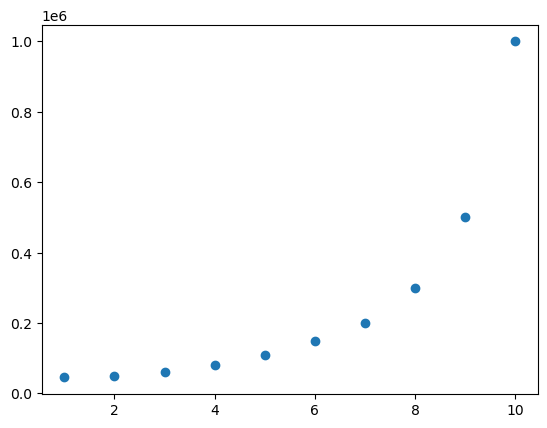

In [ ]:
#Para tener un primer vistaso de como deberia ser la regresion
plt.scatter(X, y)
plt.show()

#Se que que la funcion a aproximar no es lineal

In [ ]:
#Division de Datos - entrenamiento y validacion
#Al tener tan pocos elementos no se hace la division

In [ ]:
#Ajustar la regresion lineal, para ver como se comporta

regresion_lineal = LinearRegression()
regresion_lineal.fit(X.reshape(-1,1),y)

LinearRegression()

In [ ]:
#Ajustar la regresion lineal polinomica

#Crear la matriz polinomica de grado 2
regresion_poli_2 = preprocessing.PolynomialFeatures(degree=2)
X_polinomica = regresion_poli_2.fit_transform(X.reshape(-1,1))
X_polinomica

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
regresion_polinomial = LinearRegression()
regresion_polinomial.fit(X_polinomica,y)

LinearRegression()

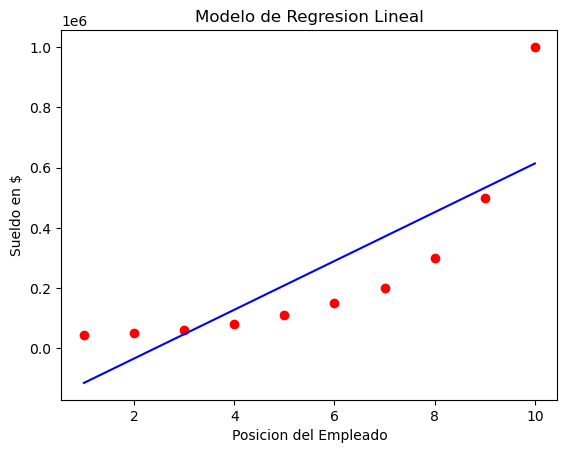

In [ ]:
#visualizacion de los datos del modelo lineal
plt.scatter(X,y, color="red")
plt.plot(X, regresion_lineal.predict(X.reshape(-1,1)), color="blue")

plt.title("Modelo de Regresion Lineal")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#Se ve que no es una buena prediccion,
#por ejemplo alguien recien empleado tendria un sueldo negativo
#El sueldo del CEO se ve rebajado hasta la mitad

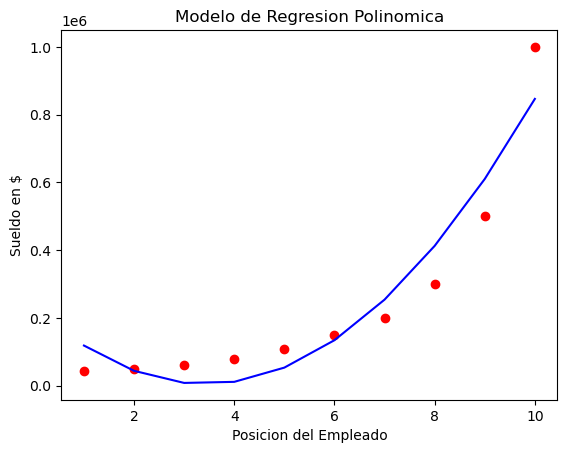

In [ ]:
#visualizacion de los datos del modelo polinomico-grado2
plt.scatter(X,y, color="red")
plt.plot(X, regresion_polinomial.predict(X_polinomica), color="blue")

plt.title("Modelo de Regresion Polinomica")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#Mejora la aproximacion y es mejor que la proximacino lineal

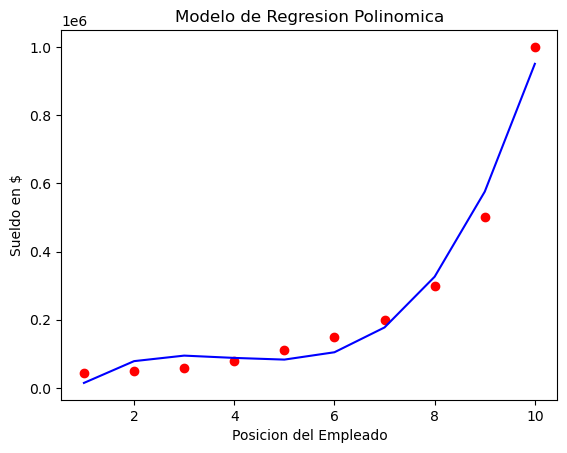

In [ ]:
#Modelo Polinomial de grado 3
#Crear la matriz polinomica de grado 2
regresion_poli_3 = preprocessing.PolynomialFeatures(degree=3)
X_polinomica = regresion_poli_3.fit_transform(X.reshape(-1,1))

regresion_polinomial = LinearRegression()
regresion_polinomial.fit(X_polinomica,y)

#visualizacion de los datos del modelo polinomico-grado3
plt.scatter(X,y, color="red")
plt.plot(X, regresion_polinomial.predict(X_polinomica), color="blue")

plt.title("Modelo de Regresion Polinomica")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()


<h3> Regresión LASSO </h3>

La regresión LASSO es un caso de regularización del modelo de regresión lineal, típicamente conocido también como regularización L1. En particular, corresponde al mismo modelo que ya vimos previamente, pero definimos la función de pérdida como:

$$h(\mathbf{\beta}) = \mathbf{e}^T \mathbf{e} + \alpha \sum_{i=1}^{N} \vert \beta_{i} \vert$$

Esta función de pérdida corresponde a encontrar:

$$\mathbf{\beta}^{*} = \arg \min \mathbf{e}^{T} \mathbf{e} \hspace{0.1in} \text{ s.a.} \sum_{i = 1}^N \vert \beta_{i} \vert < \alpha$$

Una característica importante de este modelo es que hemos introducido el parámetro $\alpha$, que indica qué tanto queremos restringir el problema de optimización. Al hacer esto, forzamos al algoritmo de Mínimos Cuadrados Ordinarios a encontrar valores pequeños en varios de los parámetros a estimar, y en algunos casos los hace ser $0$. En muchos casos, esta técnica mejora los resultados de predicción del modelo de regresión lineal y evita el sobreentrenamiento.

En aplicaciones explicativas (no predictivas), la regresión LASSO ayuda a determinar qué regresores son más relevantes para explicar la variable dependiente, $y$.

In [ ]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 + x + 2 + 3*np.random.randn(m, 1)

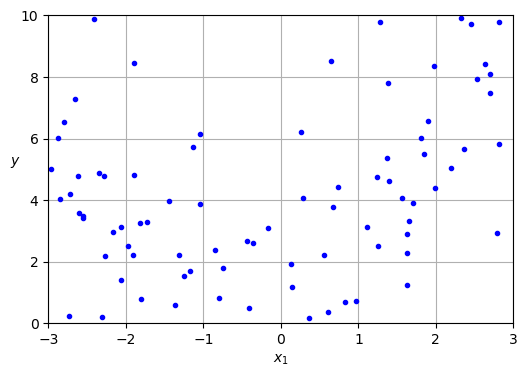

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(x, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [ ]:
print(x.shape)
print(X_poly.shape)

(100, 1)
(100, 2)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)

Lasso(alpha=0.1)

In [ ]:
model = Lasso(alpha=0.1)
model = make_pipeline(PolynomialFeatures(degree=10),
                      StandardScaler(),
                      model)

In [ ]:
model.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

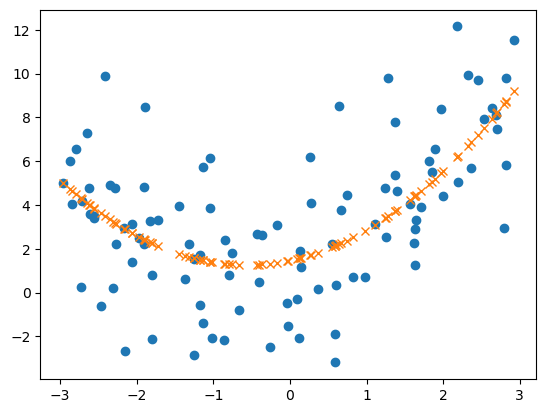

In [ ]:
y_hat = model.predict(x)
plt.plot(x, y, 'o')
plt.plot(x, y_hat, 'x')

C:\Users\afeli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.586e+01, tolerance: 5.269e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\afeli\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.005e+01, tolerance: 5.269e-02
  model = cd_fast.enet_coordinate_descent(


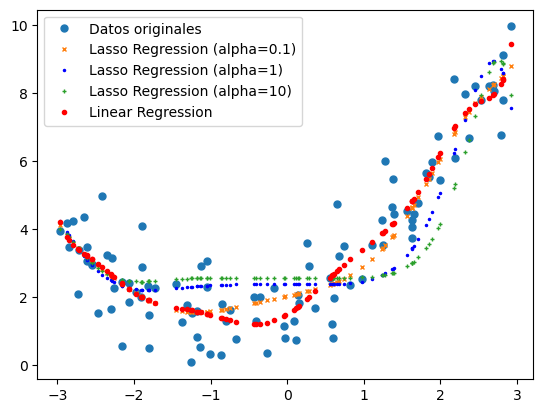

In [ ]:
from sklearn.metrics import mean_squared_error


np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Plot original data
plt.plot(X, y, 'o', label='Datos originales', markersize=5)

mse_dict = {}

# Lasso regression with different alpha values
alpha_values = [0.1, 1, 10]
for alpha, style in zip(alpha_values, ('x', 'b.', '+', '>')):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_poly, y)
    y_pred = lasso_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)

    model_name = f'Regresión LASSO (alpha: {alpha})'
    mse_dict[model_name] = mse

    # Plot Lasso regression lines
    plt.plot(X, y_pred, style, label=f'Lasso Regression (alpha={alpha})', markersize=3)

plt.plot(X, lin_reg.predict(X_poly), 'o',label='Linear Regression', color='r', markersize=3)
plt.legend()
plt.show()

mse = mean_squared_error(y, lin_reg.predict(X_poly))

mse_dict['Regresión clásica'] = mse

In [ ]:
import pandas as pd
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index')
mse_df.columns = ['MSE']
mse_df

,MSE
Regresión LASSO (alpha: 0.1),0.814976
Regresión LASSO (alpha: 1),1.389765
Regresión LASSO (alpha: 10),1.797077
Regresión clásica,0.739909


<h3> Regresión Ridge </h3>

La regresión Ridge es otro caso de regularización del modelo de regresión lineal, típicamente conocido también como regularización L2. En este caso, la función de pérdida es

$$h(\beta) = \mathbf{e}^{T} \mathbf{e} + \alpha \sum_{i = 1}^{N} \beta_{i} ^{2}$$

Esta función de pérdida corresponde a encontrar:

$$\arg \min \mathbf{e}^{T} \mathbf{e} \hspace{0.1in} \text{ s.a.} \sum_{i = 1}^N  \beta_{i}^{2} < \alpha$$

Para este caso, el método de Mínimos Cuadrados Ordinarios genera el estimador

$$\beta^{*} = \left( \mathbf{X}^{T} \mathbf{X} + \alpha I \right)^{-1} \mathbf{X}^{T} \mathbf{Y}$$

dónde $I$ corresponde a la matriz identidad, por lo que

$$\alpha I =  \begin{pmatrix}
\alpha & 0 & \cdots & 0 \\
 0 &  \alpha & \cdots  & 0 \\
 \vdots & \vdots & \ddots & 0 \\
  0& 0 & \cdots & \alpha \\
\end{pmatrix}$$

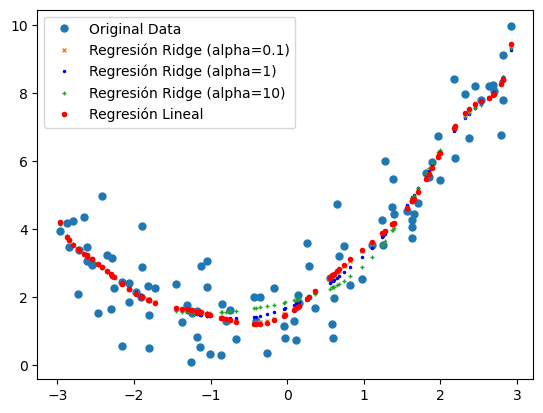

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# Polynomial features
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Plot original data
plt.plot(X, y, 'o', label='Original Data', markersize=5)

mse_dict = {}

# Lasso regression with different alpha values
alpha_values = [0.1, 1, 10]
for alpha, style in zip(alpha_values, ('x', 'b.', '+', '>')):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_poly, y)
    y_pred = ridge_reg.predict(X_poly)
    mse = mean_squared_error(y, y_pred)

    model_name = f'Regresión Ridge (alpha: {alpha})'
    mse_dict[model_name] = mse

    # Plot Lasso regression lines
    plt.plot(X, y_pred, style, label=f'Regresión Ridge (alpha={alpha})', markersize=3)

plt.plot(X, lin_reg.predict(X_poly), 'o',label='Regresión Lineal', color='r', markersize=3)
plt.legend()
plt.show()

mse = mean_squared_error(y, lin_reg.predict(X_poly))

mse_dict['Regresión clásica'] = mse

In [ ]:
import pandas as pd
mse_df = pd.DataFrame.from_dict(mse_dict, orient='index')
mse_df.columns = ['MSE']
mse_df

,MSE
Regresión Ridge (alpha: 0.1),0.740386
Regresión Ridge (alpha: 1),0.751744
Regresión Ridge (alpha: 10),0.784249
Regresión clásica,0.739909


# Regresión con Árboles de Decisión

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [ ]:
# apertura de archivo
ruta = "Position_Salaries.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 1:2].values.reshape(-1,1) # Matriz de caracteristicas, debe ser una matriz
y = dataset.iloc[:,2].values.reshape(-1,1)

In [ ]:
#Ajusta el modelo de arbol de desicion
regresion = DecisionTreeRegressor(random_state=0)
regresion.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [ ]:
#Prediccion de sueldo de alguien de escala 6.5

y_pre = regresion.predict(np.array([[6.5]]))
y_pre

array([150000.])

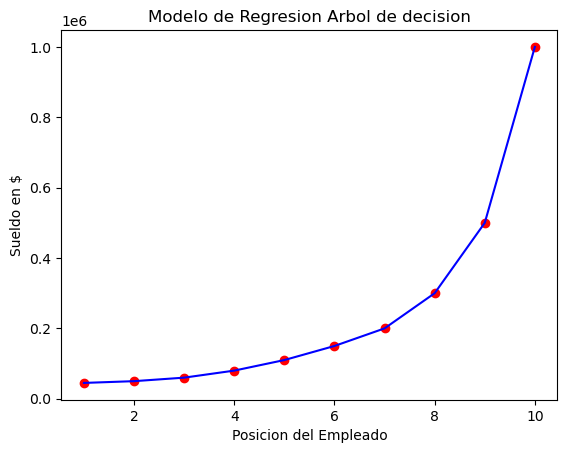

In [ ]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion Arbol de decision")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#Esta bien, pero podria ser un sobreajuste
#es como generar 10 casilleros en el ajuste

# Regresion con Bosques Aleatorios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [ ]:
# apertura de archivo
ruta = "Position_Salaries.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 1:2].values.reshape(-1,1) # Matriz de caracteristicas, debe ser una matriz
y = dataset.iloc[:,2].values.reshape(-1,1)

In [ ]:
regresion = RandomForestRegressor(n_estimators=10, random_state=0)
regresion.fit(X,y)

C:\Users\afeli\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
#Prediccion de sueldo de alguien de escala 6.5

y_pre = regresion.predict(np.array([[6.5]]))
y_pre

array([167000.])

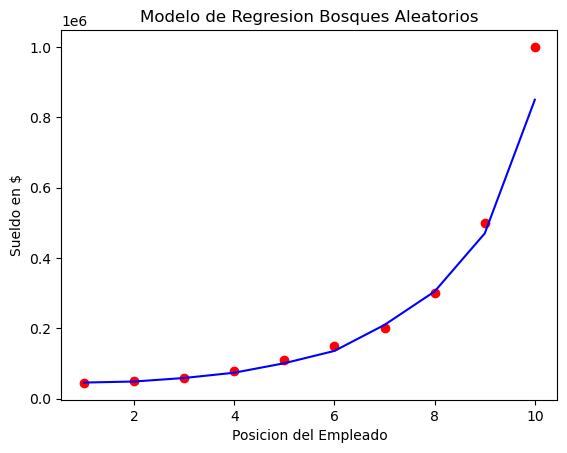

In [ ]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion Bosques Aleatorios")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#Hace una mejor prediccion que el arbol aleatorio

C:\Users\afeli\AppData\Local\Temp\ipykernel_33752\872173517.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


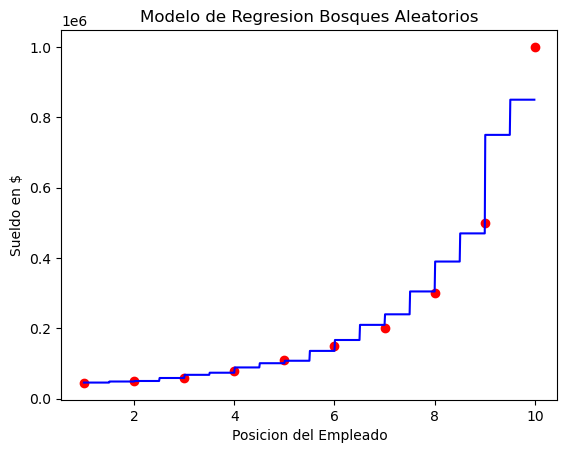

In [ ]:
# Visualización de los resultados del Random Forest
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regresion.predict(X_grid), color = "blue")
plt.title("Modelo de Regresion Bosques Aleatorios")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#Este grafico nos muestra que la prediccion no es continua y bonita.
#Muchos de los algoritmos hacen predicciones de este estilo

# Regresion con Maquinas de Soporte Vectorial

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing

In [ ]:
# apertura de archivo
ruta = "Position_Salaries.csv"

dataset = pd.read_csv(ruta)
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
#se asignan las variable dependiente e independiente
X = dataset.iloc[:, 1:2].values.reshape(-1,1) # Matriz de caracteristicas, debe ser una matriz
y = dataset.iloc[:,2].values.reshape(-1,1)

In [ ]:
# Escalado de Variables - Estandarizacion y Normalizacion

sc_X = preprocessing.StandardScaler()
X = sc_X.fit_transform(X)
sc_y = preprocessing.StandardScaler()
y = sc_y.fit_transform(y)

print("X",X,"\n", "y",y )

X [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] 
 y [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [ ]:
#Ajustar la regresion con una maquina de soporte vectorial-kernel Gaussiano

#Para este modelo de deben estandarizar los datos a utilizar
regresion = SVR(kernel="rbf")
regresion.fit(X,y)

C:\Users\afeli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

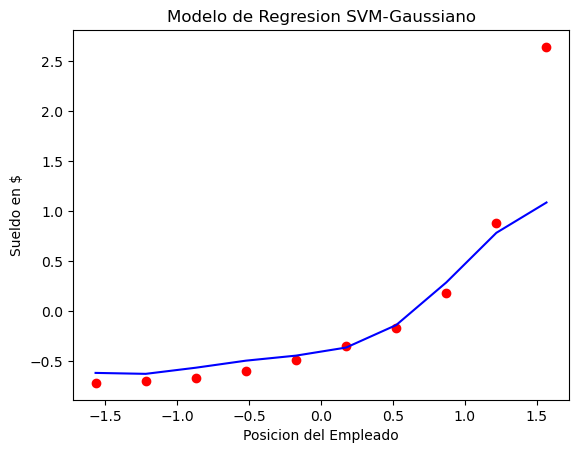

In [ ]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion SVM-Gaussiano")
plt.ylabel("Sueldo en $")
plt.xlabel("Posicion del Empleado")
plt.show()

#No es una aproximacion buena, pero mejor que el kernel polinomial

In [ ]:
#Prediccion del modelo, para escala salarial de 6.5
arreglo = np.array([[6.5]])
y_pre = regresion.predict(sc_X.transform(arreglo))
y_pre = sc_y.inverse_transform(y_pre.reshape(-1,1))
y_pre

array([[170370.0204065]])

In [ ]:
#Ajustar la regresion con una maquina de soporte vectorial-kernel Gaussiano

#Para este modelo de deben estandarizar los datos a utilizar
regresion = SVR(kernel="poly")
regresion.fit(X,y)

C:\Users\afeli\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='poly')

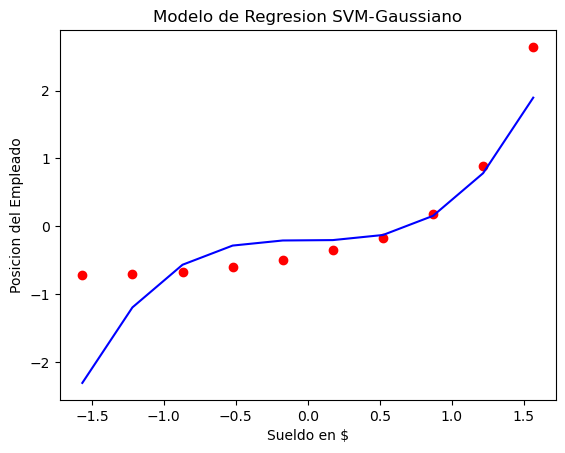

In [ ]:
#visualizacion de los datos del modelo SVM kernel gaussiano
plt.scatter(X,y, color="red")
plt.plot(X, regresion.predict(X), color="blue")

plt.title("Modelo de Regresion SVM-Gaussiano")
plt.xlabel("Sueldo en $")
plt.ylabel("Posicion del Empleado")
plt.show()

#Es mejor la aproximacion con el kernel Gaussiano